# Greenhouse gas benefit from aerial urea application in forests
### British Columbia's Forest Carbon Initiative

Robbie A Hember, PhD, P.Ag.

Last updated: 2020-03-17

Climate Change and Integrated Planning Branch,<br>
Office of the Chief Forester,<br>
Forests Lands, Natural Resource Operations and Rural Development<br>
Government of British Columbia<br>
545 Superior Street, Victoria, Canada<br>
robert.hember@gov.bc.ca

## Introduction

This notebook describes estimates of the impact of aerial nutrient application on atmospheric greenhouse gas (GHG) balance. Examples are given for projects in coastal and interior regions of British Columbia, Canada. For each region, the GHG benefit is calculated from the differnece between the project and baseline scenarios (i.e. with and without nutrient application). The regional examples are evaluated twice, first assuming they are not harvested before 2050, and second assuming they are harvested 15 years after fertilization (before 2050).

## Methods

### Prepare session
Import the required python packages. To do this work, we will use the computer simulation model <i>cbrunner</i> from the <i>fcgadgets</i> repository.

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.core.display import display, HTML
import warnings
from fcgadgets.macgyver import utilities_general as gu
from fcgadgets.macgyver import utilities_demo as udem
from fcgadgets.cbrunner import cbrun_utilities as cbu
from fcgadgets.cbrunner import cbrun as cbr
%matplotlib inline
plt.style.use('ggplot')
warnings.filterwarnings('ignore')
display(HTML("<style>.container { width:80% !important; } .output {align-items: left; }</style>"))

Import graphics parameters.

In [2]:
plt.rcParams.update( cbu.Import_GraphicsParameters('FCI_Demo') )

In [3]:
#oper='From Scratch'
oper='Import Existing'

### Prepare inputs
Start to configure the project based on project parameters and scenario parameters in ProjectConfig.xlsx. Set the directory path to point to the project data.

In [4]:
if oper=='From Scratch':
    meta={}
    meta['Paths']={}
    meta['Paths']['Project']=r'C:\Users\rhember\Documents\Data\FCI_Projects\FCI_Demo_Fertilization'
    meta['Paths']['Model Code']=r'C:\Users\rhember\Documents\Code_Python\fcgadgets\cbrunner'
    meta['Paths']['Taz Datasets']=r'C:\Users\rhember\Documents\Data\Taz Datasets'
    meta['Paths']['Figures']=r'C:\Users\rhember\OneDrive - Government of BC\Figures\Fertilization\Demo'
    meta=cbu.ImportProjectConfig(meta)
else:
    meta=gu.ipickle(r'C:\Users\rhember\Documents\Data\FCI_Projects\FCI_Demo_Fertilization\Inputs\Metadata.pkl')

In [5]:
meta['Print Figures']='On'

Considering two regions, two harvest schedules per region, and two treatment scenarios per region and harvest schedule yields a total of 8 scenarios:

    1) Coastal - no harvesting - baseline
    2) Coastal -  no harvesting - project
    3) Interior - no harvesting - baseline
    4) Interior - no harvesting - project
    5) Coastal - with harvesting - baseline
    6) Coastal - with harvesting - project
    7) Interior - with harvesting - baseline
    8) Interior - with harvesting - project

In [6]:
if oper=='From Scratch':
    cbu.Write_BatchTIPSY_Input_File(meta)
    cbu.PrepareInventoryFromSpreadsheet(meta)
    cbu.BuildEventChronologyFromSpreadsheet(meta)
    cbu.PrepGrowthCurvesForCBR(meta)

Run the model.

In [7]:
if oper=='From Scratch':
    cbr.MeepMeep(meta)
    cbu.MOS_FromPoints_ByProjAndReg_GHG(meta)
    cbu.MOS_FromPoints_ByProjAndReg_Econ(meta)

In [8]:
mos=cbu.Import_Scenario_Data_FromPoints(meta)
mos['Delta']={}
mos['Delta']['Coast / No Harvest']={'iB':0,'iP':1}
mos['Delta']['Inteiror / No Harvest']={'iB':2,'iP':3}
mos['Delta']['Coast / With Harvest']={'iB':4,'iP':5}
mos['Delta']['Interior / With harvest']={'iB':6,'iP':7}
mos=cbu.Import_ScenarioComparisons_FromPoints(meta,mos)
gu.opickle(meta['Paths']['Project'] + '\\Outputs\\MOS.pkl',mos)
tv=np.arange(meta['Project']['Year Start Saving'],meta['Project']['Year End']+1,1)

In [9]:
v0=udem.GetSingleEnsembleResults(meta)
v0=udem.CalculateAggregateVariables(meta,v0)

In [10]:
th=[2030,2050,2070,2080,2100]
for t_end in th:
    df=udem.ExportSummariesByScenario(meta,mos,meta['Project']['Year Project'],t_end)

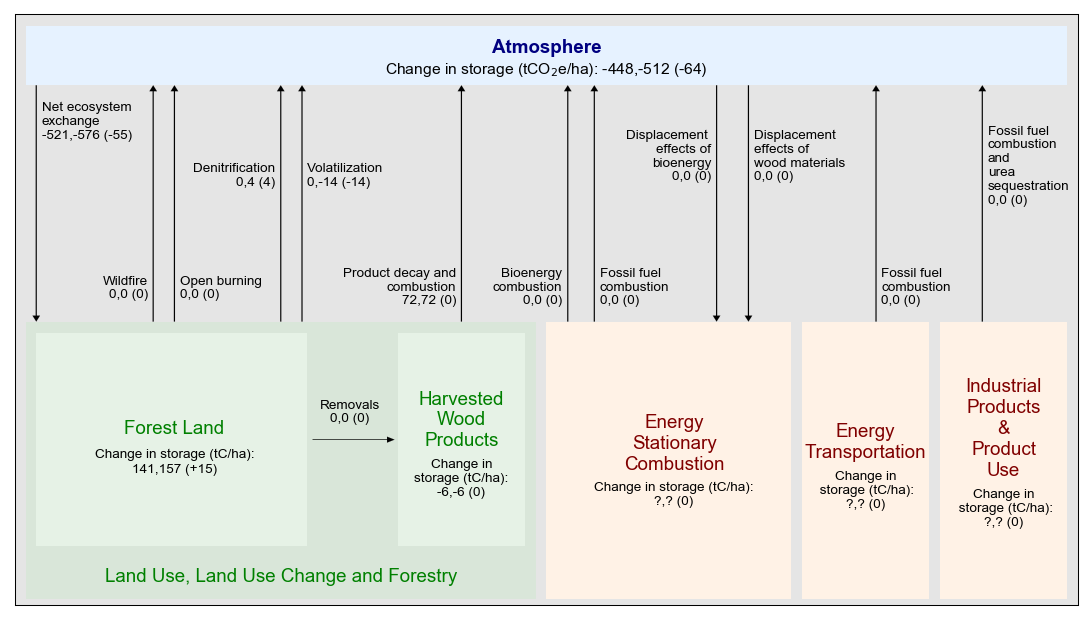

In [11]:
iB=0
iP=1
udem.PlotSchematicAtmoGHGBal(meta,mos,iB,iP,meta['Project']['Year Project'],meta['Project']['Year Project']+30)

## Quality Assurance Measures

### Compare predicted tree biomass pools with observed regional averages from ground plots

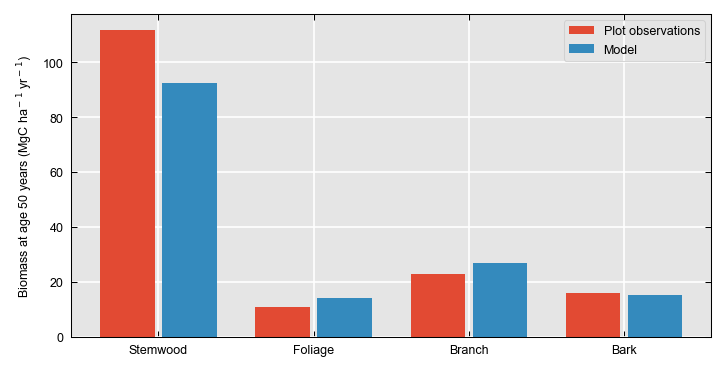

In [12]:
# Import observations at permanent sample plots to verify that the model is realistically predicting biomass pools
obs=gu.ReadExcel(meta['Paths']['Model Code'] + '\\QA\\AverageForestBiomassPoolsByRegionFromPSPs.xlsx')

iScn=1
it=np.where( (tv>1984) & (v0[iScn]['A'][:,0]==50) )[0]
Csw=v0[iScn]['C_Eco_Pools'][it,0,0]+v0[iScn]['C_Eco_Pools'][it,0,1]
Cf=v0[iScn]['C_Eco_Pools'][it,0,2]
Cbr=v0[iScn]['C_Eco_Pools'][it,0,3]
Cbk=v0[iScn]['C_Eco_Pools'][it,0,4]
Cmod=np.array([Csw,Cf,Cbr,Cbk]).flatten()

fig,ax=plt.subplots(1,figsize=gu.cm2inch(12,6))
ax.bar(np.array([0,1,2,3])-0.2,obs['Coast_Age50'],0.35,label='Plot observations')
ax.bar(np.array([0,1,2,3])+0.2,Cmod,0.35,label='Model')
ax.set(ylabel='Biomass at age 50 years (MgC ha$^-$$^1$ yr$^-$$^1$)',xticks=[0,1,2,3],xticklabels=['Stemwood','Foliage','Branch','Bark']);
ax.legend(loc="upper right",facecolor="None");
ax.yaxis.set_ticks_position('both'); ax.xaxis.set_ticks_position('both');
#gu.PrintFig(meta['Paths']['Figures'] + '\\Observed vs Modelled Biomass at age 50 iterior stand','png',900);

### Plot financial variables

In [13]:
t_start=1925
t_end=2100
#udem.PlotCashflow(meta,mos,iB,iP,t_start,t_end)

## Results
Select a pair of baseline and project scenarios.

In [14]:
# Coast, undisturbed
iB=0; iP=1
iPT=0
iReg=0
# Interior, undisturbed
#iB=2; iP=3
#iB=8; iP=9

### Response of merchantable stemwood volume

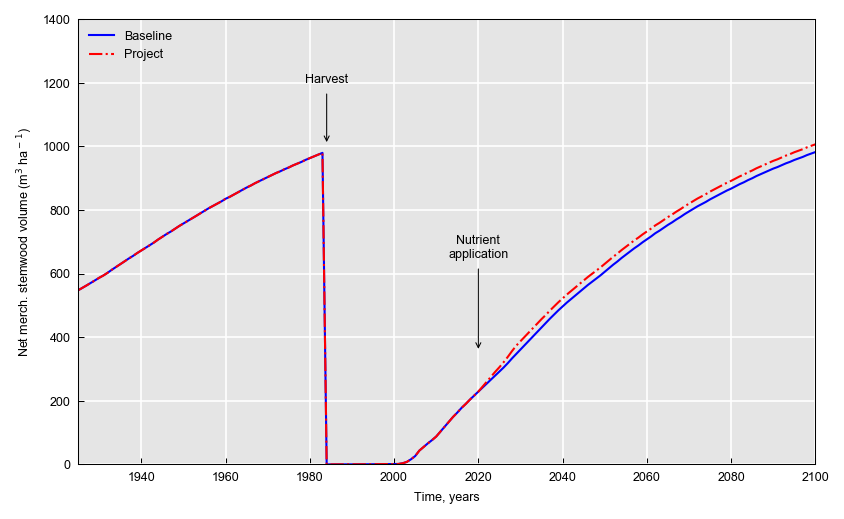

In [15]:
iT=np.where((tv>=1925) & (tv<=2100))[0]
fig,ax=plt.subplots(1,figsize=gu.cm2inch(14,8.5))
ax.plot(tv[iT],mos['Scenarios'][iB]['Mean']['V_MerchTotal']['Ensemble Mean'][iT,iPT,iReg],'-',color=(0,0,1),label='Baseline')
ax.plot(tv[iT],mos['Scenarios'][iP]['Mean']['V_MerchTotal']['Ensemble Mean'][iT,iPT,iReg],'-.',color=(1,0,0),label='Project')
ax.legend(loc='upper left',frameon=False,facecolor=None)
ax.set(ylim=[0,1400],ylabel=r'Net merch. stemwood volume (m$^3$ ha$^-$$^1$)',
       xlim=[np.min(tv[iT]),np.max(tv[iT])],xlabel=r'Time, years');
ax.annotate('Harvest',xy=(meta['Project']['Year Project']-36,1000),xytext=(meta['Project']['Year Project']-36,1200),
            arrowprops={'color':'black','arrowstyle':'->'},ha='center');
ax.annotate('Nutrient\napplication',xy=(meta['Project']['Year Project'],350),xytext=(meta['Project']['Year Project'],650),
            arrowprops={'color':'black','arrowstyle':'->'},ha='center');
#plt.suptitle('Figure 1. Fertilization of a coastal forest.');
#gu.PrintFig(meta['Paths']['Figures'] + '\\Volume','png',900);

### Plot carbon pools

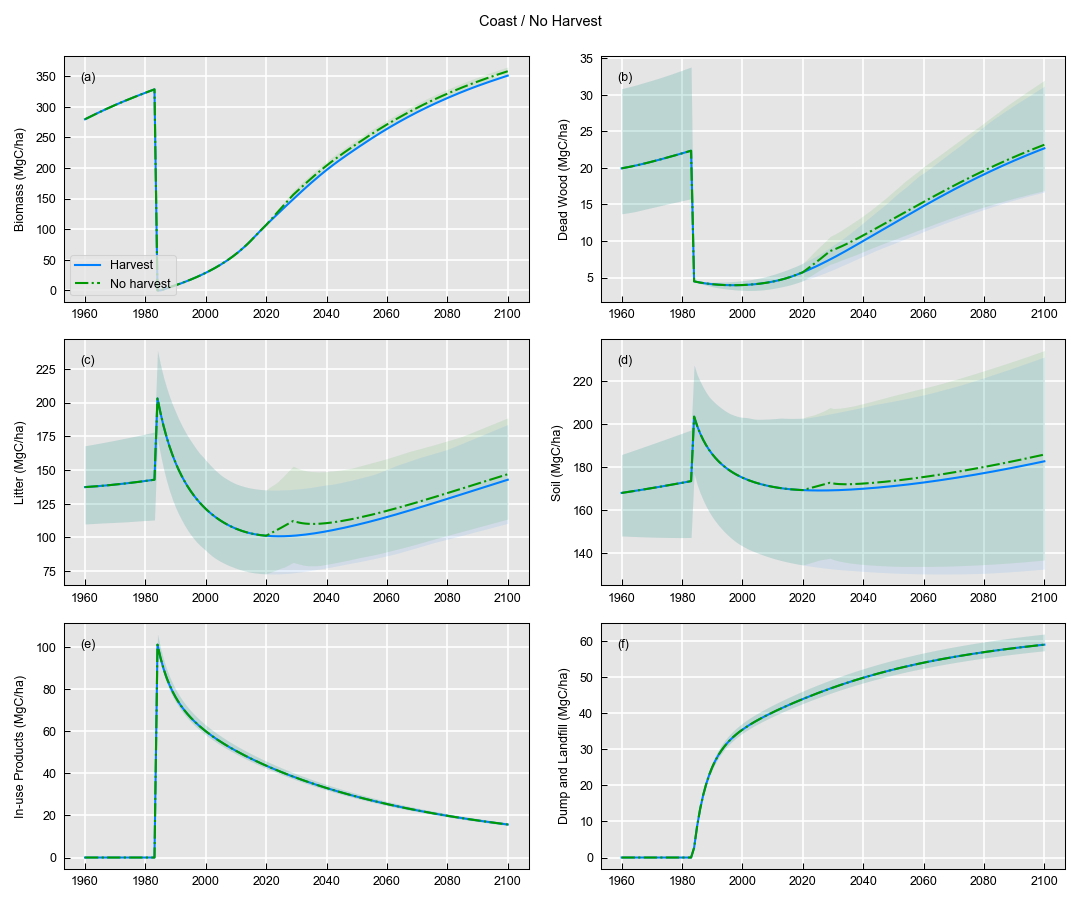

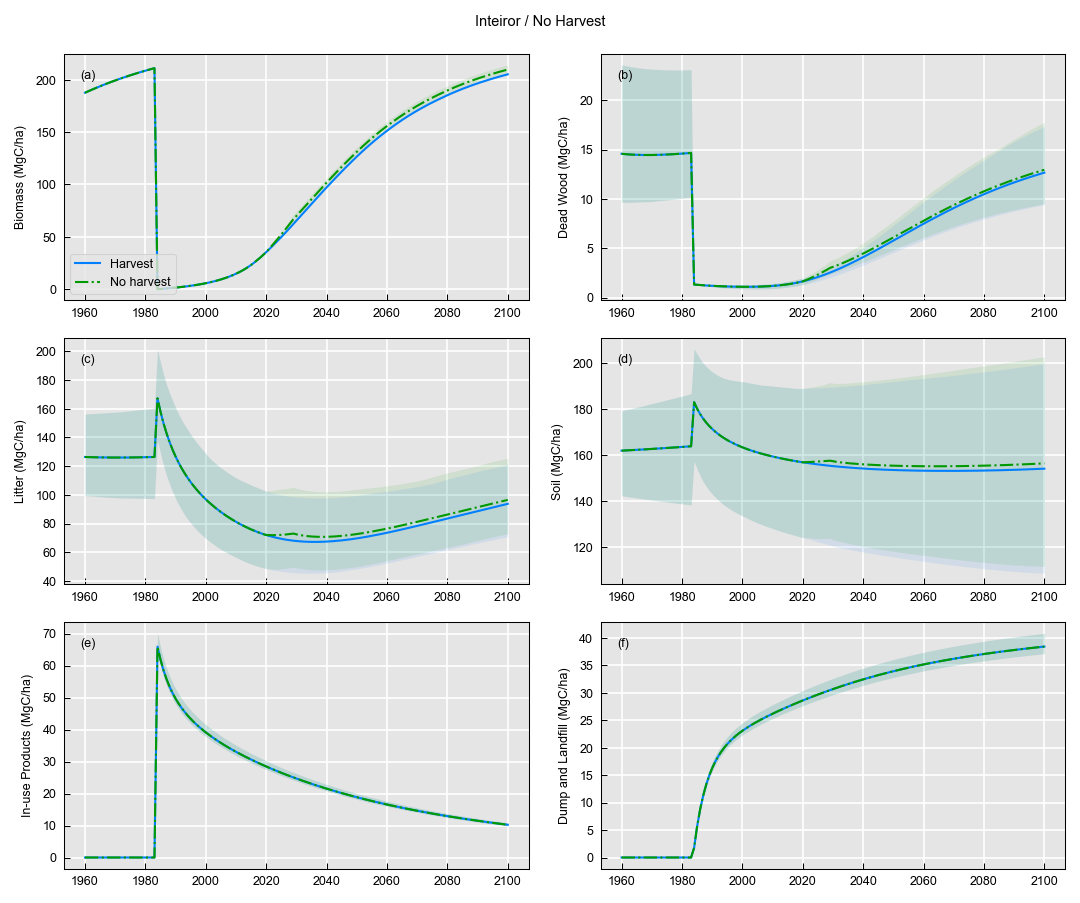

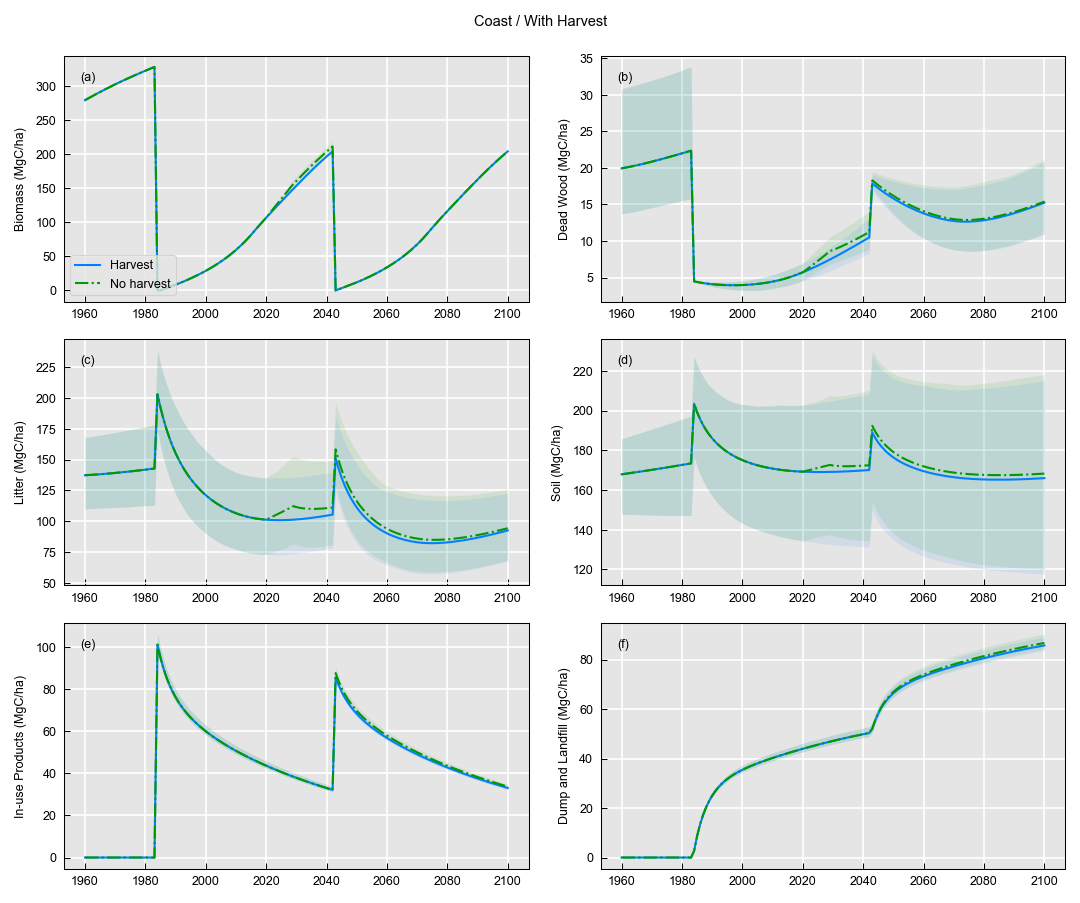

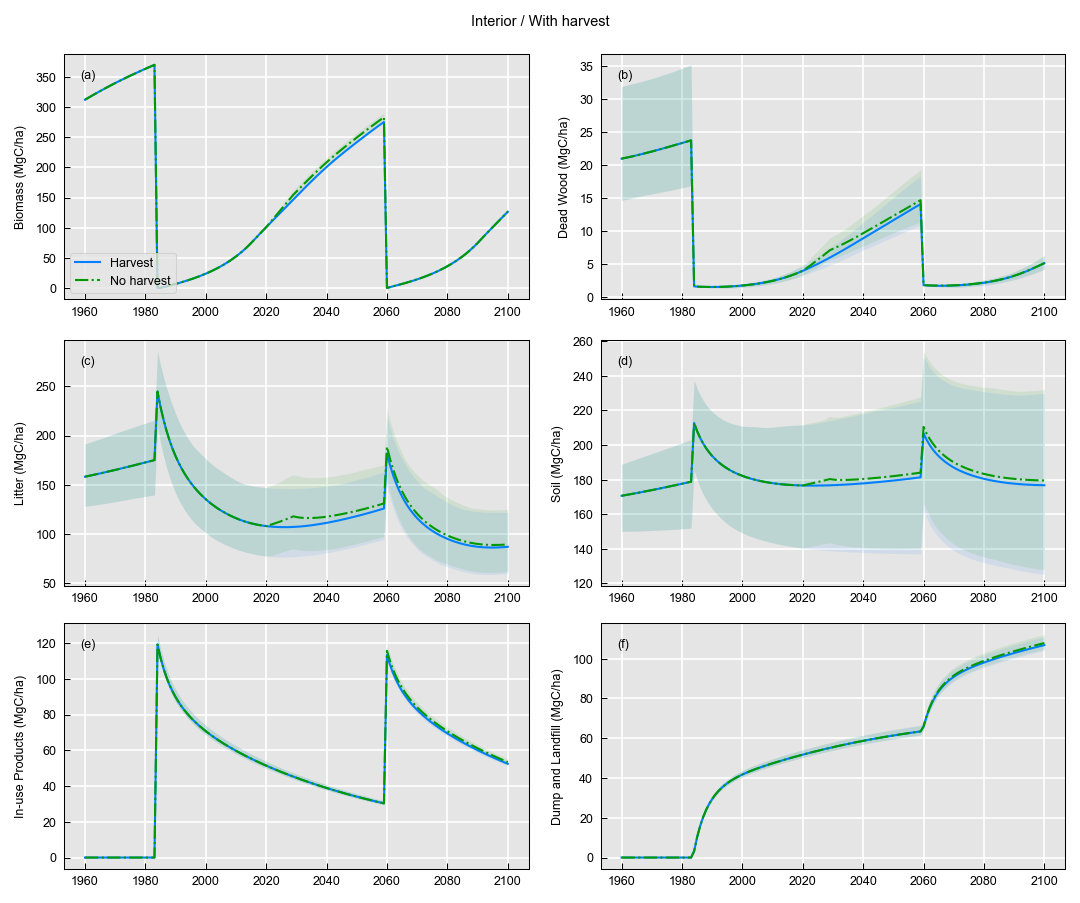

In [16]:
iT=np.where((tv>=1960) & (tv<=2100))[0]
udem.PlotPools(meta,mos,tv,iT)

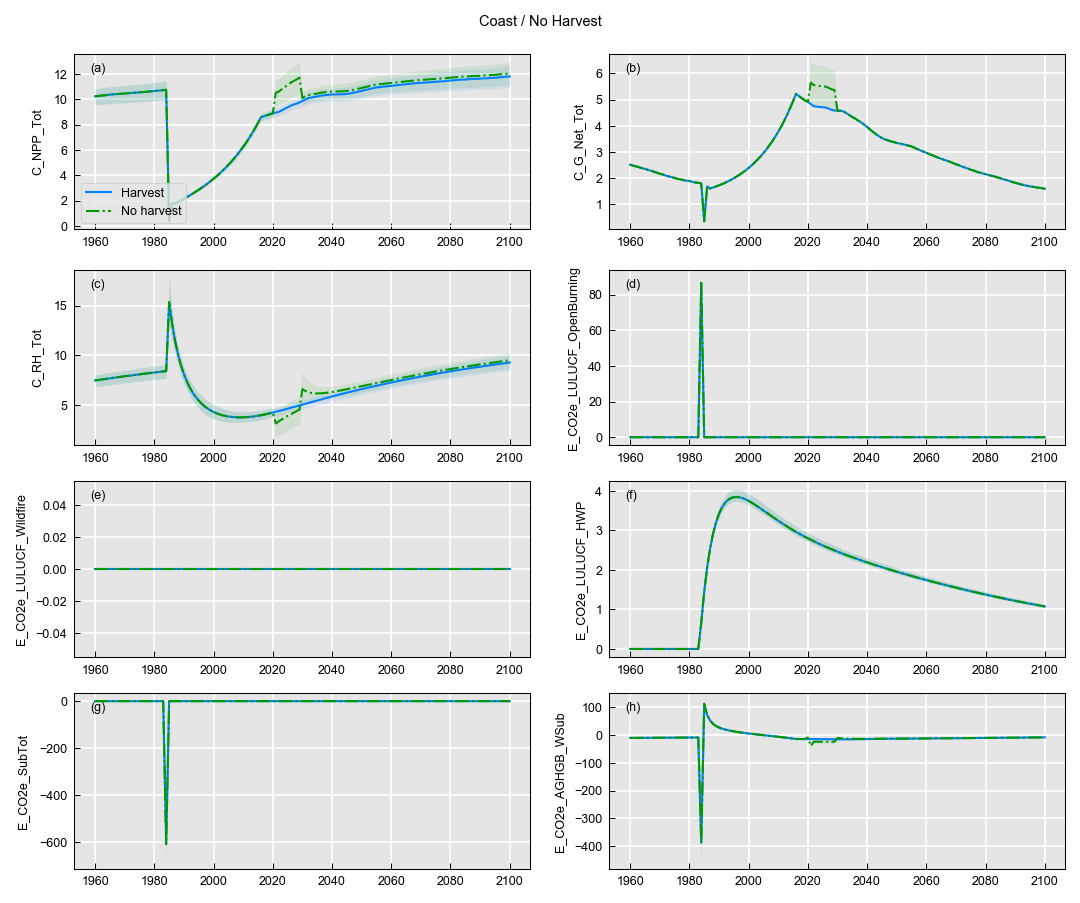

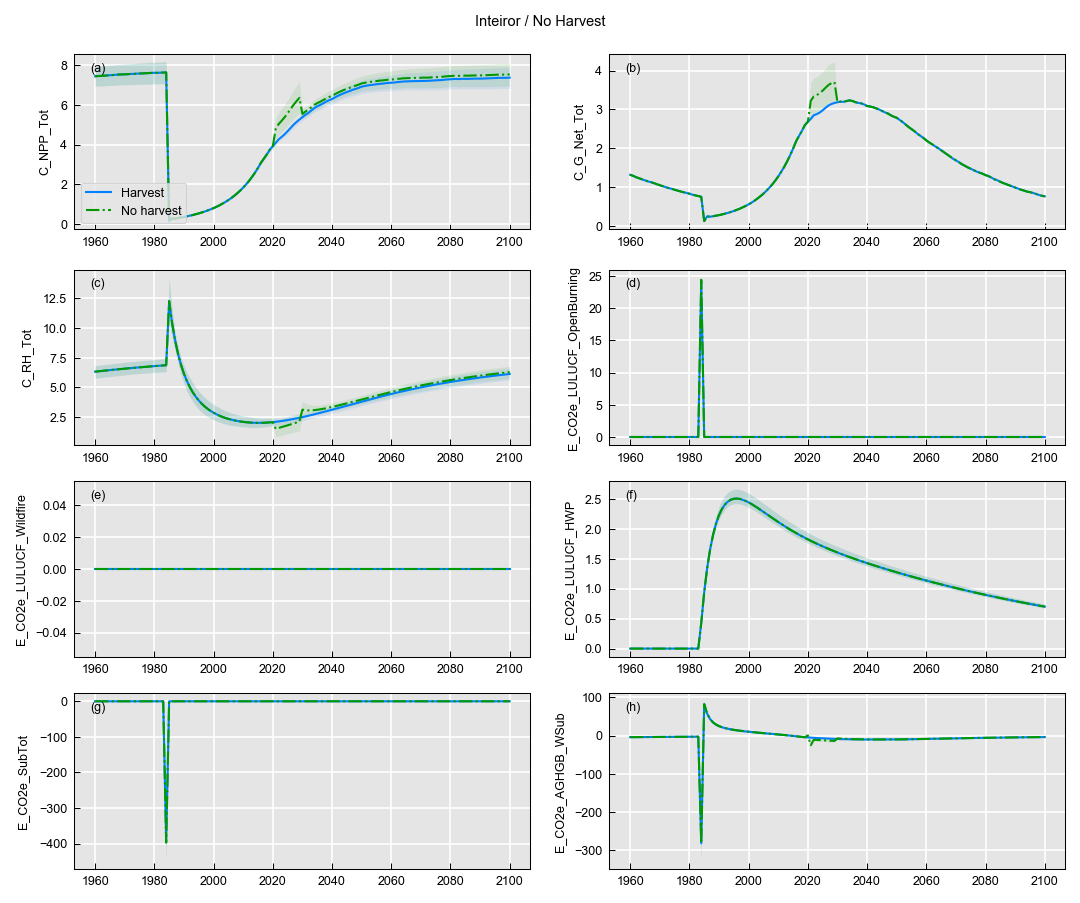

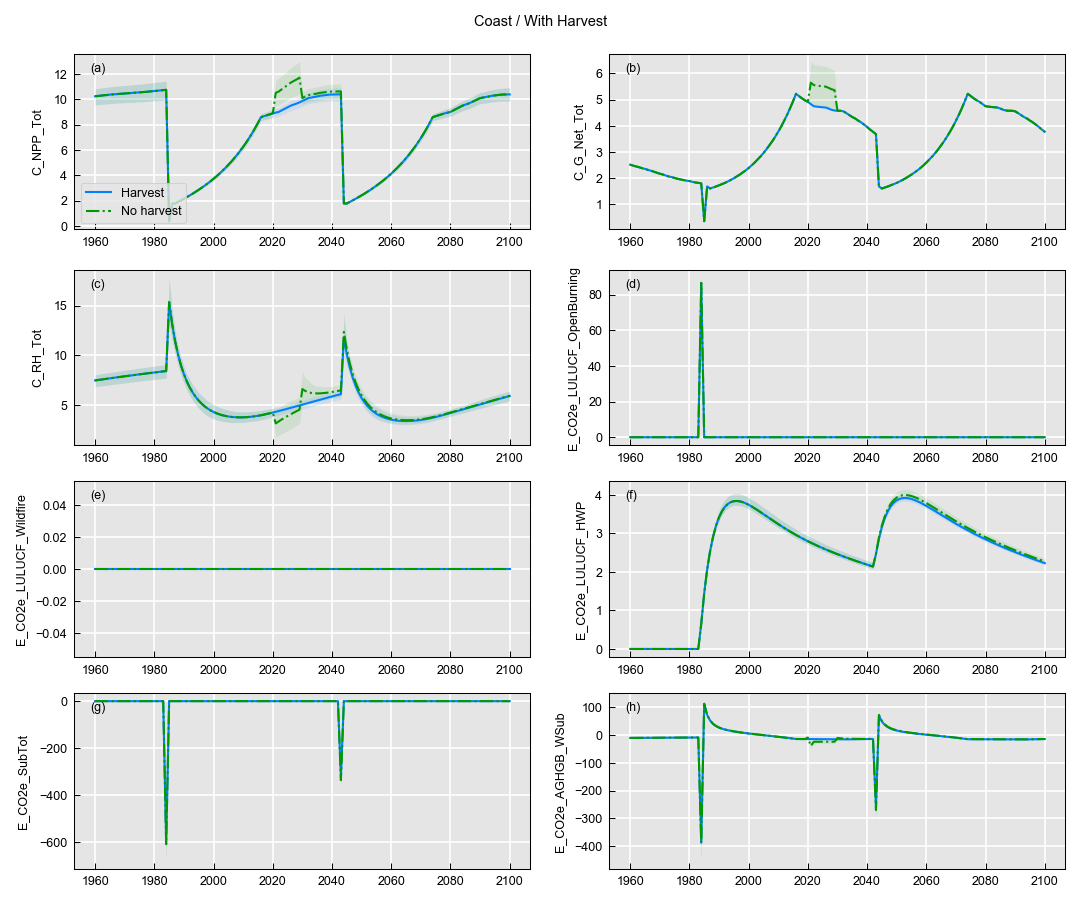

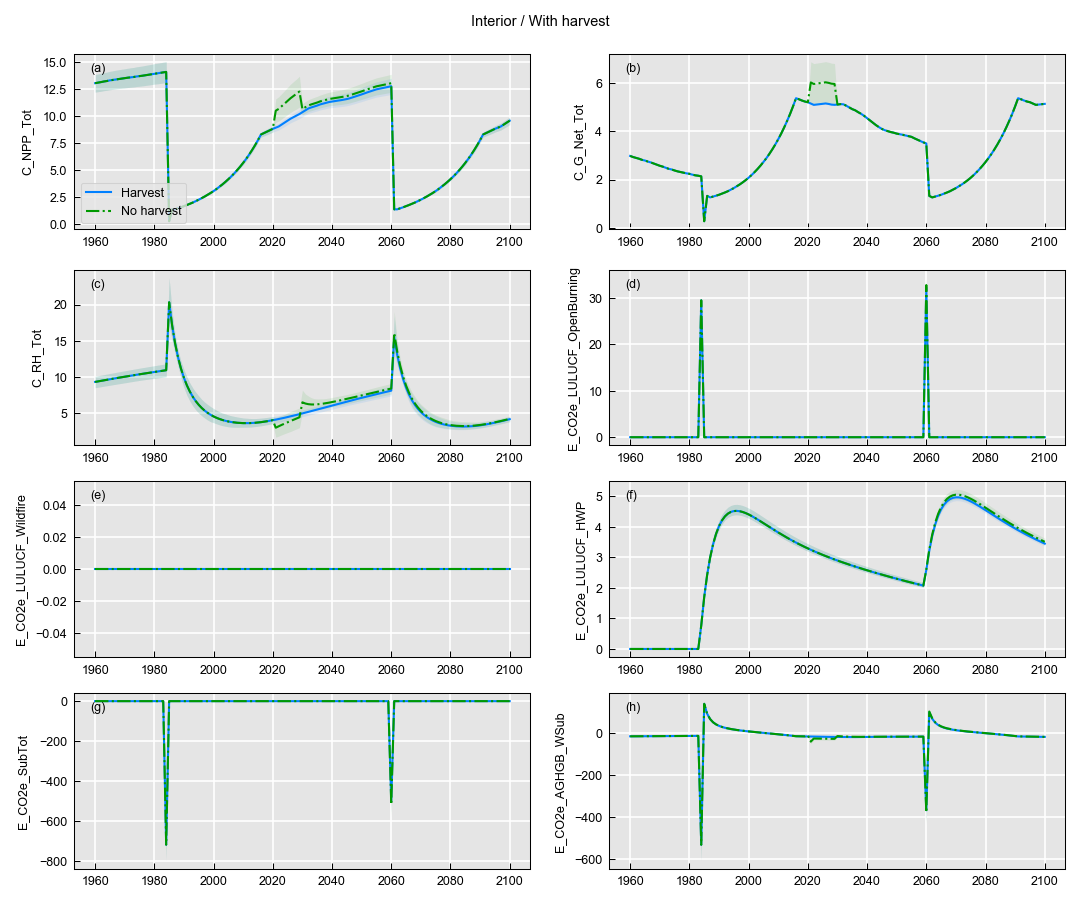

In [17]:
udem.PlotFluxes(meta,mos,tv,iT)

### Plot atmospheric GHG balance

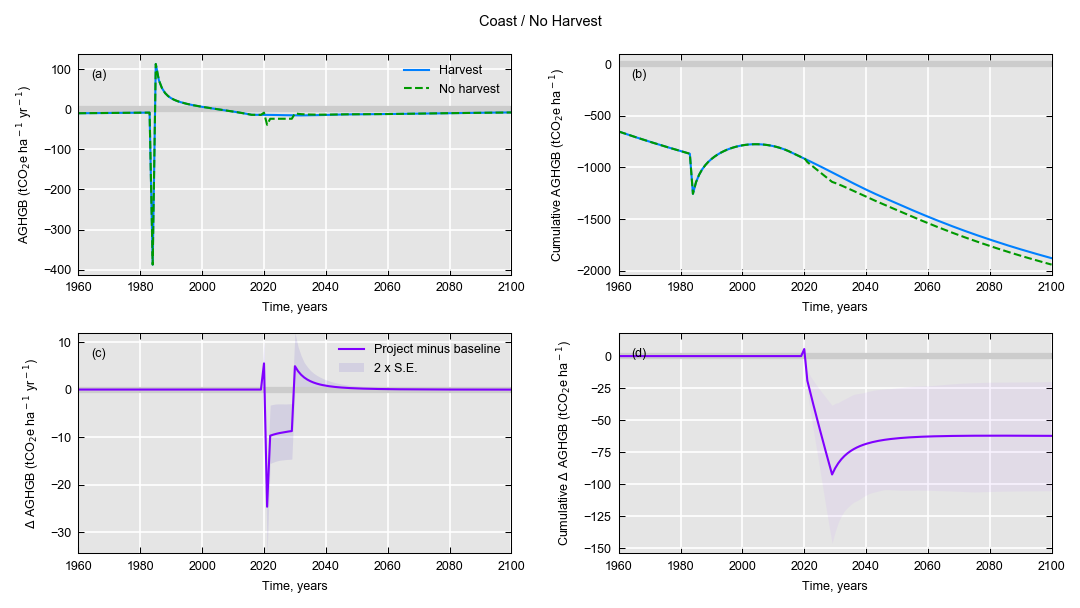

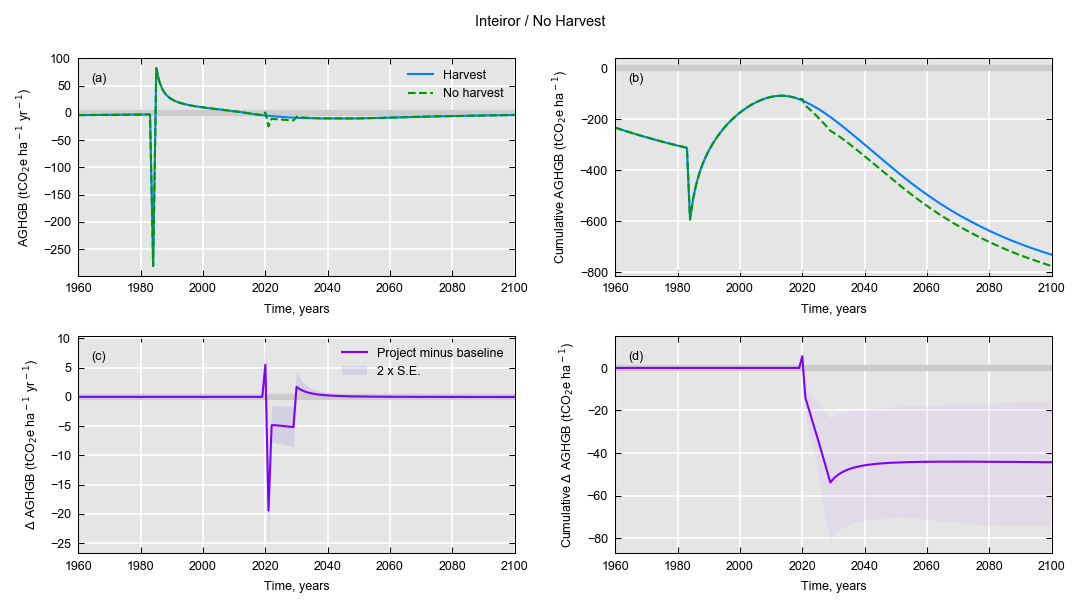

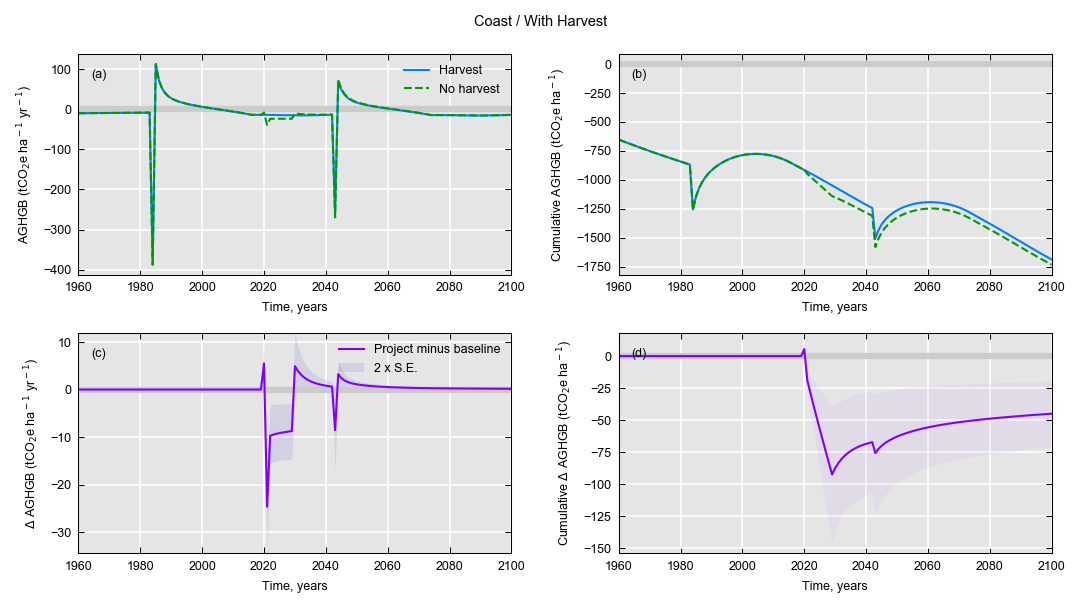

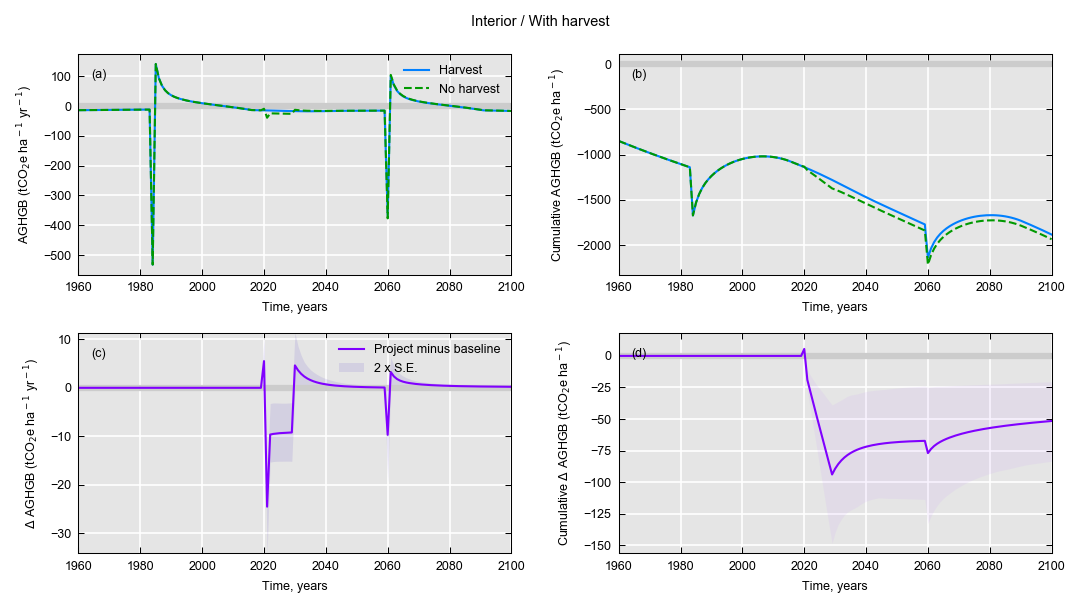

In [18]:
udem.PlotGHGB(meta,mos,tv,iT)

### But where does the CO<sub>2</sub> go?

KeyError: 1

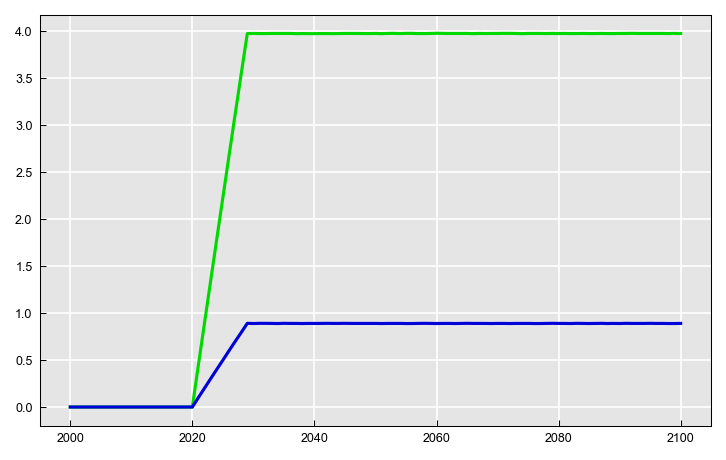

In [19]:
iT=np.where((tv>=2000) & (tv<=2100))[0]

fig,ax=plt.subplots(1,figsize=gu.cm2inch(12,7.5))
ax.plot(tv[iT],v0[iP]['C_BiomassAG_Tot'][iT]-v0[iB]['C_BiomassAG_Tot'][iT],'-',color=[0,0.85,0],label='Biomass (aboveground)',linewidth=1.5)
ax.plot(tv[iT],v0[iP]['C_BiomassBG_Tot'][iT]-v0[iB]['C_BiomassBG_Tot'][iT],'-',color=[0,0,0.85],label='Biomass (belowground)',linewidth=1.5)
ax.plot(tv[iT],mos[iP]['v1']['Mean']['C_DeadWood_Tot']['Ensemble Mean'][iT,iPT,iReg]-mos[iB]['v1']['Mean']['C_DeadWood_Tot']['Ensemble Mean'][iT,iPT,iReg],'-',color=[0,1,1],label='Dead Wood',linewidth=1.5)
ax.plot(tv[iT],mos[iP]['v1']['Mean']['C_Litter_Tot']['Ensemble Mean'][iT,iPT,iReg]-mos[iB]['v1']['Mean']['C_Litter_Tot']['Ensemble Mean'][iT,iPT,iReg],'-',color=[0.7,0,1],label='Litter',linewidth=1.5)
ax.plot(tv[iT],mos[iP]['v1']['Mean']['C_Soil_Tot']['Ensemble Mean'][iT,iPT,iReg]-mos[iB]['v1']['Mean']['C_Soil_Tot']['Ensemble Mean'][iT,iPT,iReg],'-',color=[0.85,0,0],label='Soil Organic Matter',linewidth=1.5)
ax.legend(loc="upper left",frameon=False,facecolor=None)
ax.set(xlim=[2000,2100],xticks=np.arange(2000,2110,10),ylabel=r'Incremental sequestration (MgC/ha)')
fig.suptitle('Figure 3. Tracking the fate of increased carbon storage due to fertilization.');
#gu.PrintFig(meta['Paths']['Figures'] + '\\SequestrationByPools','png',900);

In [ ]:
# Save for article figure (FCI_Demo_Fertilization_FiguresForGHGBenefitPaper.py)
d={}
d['Year']=tv[iT]

stem_p=v0[iP]['C_Eco_Pools'][:,0, meta['Core']['iEP']['StemMerch'] ]+ \
    v0[iP]['C_Eco_Pools'][:,0, meta['Core']['iEP']['StemNonMerch'] ]
stem_b=v0[iB]['C_Eco_Pools'][:,0, meta['Core']['iEP']['StemMerch'] ]+ \
    v0[iB]['C_Eco_Pools'][:,0, meta['Core']['iEP']['StemNonMerch'] ]
d['Stemwood']=stem_p[iT]-stem_b[iT]
d['Snags']=v0[iP]['C_Eco_Pools'][iT,0, meta['Core']['iEP']['SnagStem'] ]-v0[iB]['C_Eco_Pools'][iT,0, meta['Core']['iEP']['SnagStem'] ]

d['BiomassAG']=v0[iP]['C_BiomassAG_Tot'][iT]-v0[iB]['C_BiomassAG_Tot'][iT]
d['BiomassBG']=v0[iP]['C_BiomassBG_Tot'][iT]-v0[iP]['C_BiomassBG_Tot'][iT]
d['DeadWood']=v0[iP]['C_DeadWood_Tot'][iT]-v0[iB]['C_DeadWood_Tot'][iT]
d['Litter']=v0[iP]['C_Litter_Tot'][iT]-v0[iB]['C_Litter_Tot'][iT]
d['Soil']=v0[iP]['C_Soil_Tot'][iT]-v0[iB]['C_Soil_Tot'][iT]
d['CO2e_NGHGB']=v0[iP]['E_CO2e_AGHGB_WSub'][iT]-v0[iB]['E_CO2e_AGHGB_WSub'][iT]
#gu.opickle(meta['Paths']['Project'] + '\\Outputs\\PoolResponses_FDC_NGS.pkl',d)
#gu.opickle(meta['Paths']['Project'] + '\\Outputs\\PoolResponses_FDC_NGT.pkl',d)
#gu.opickle(meta['Paths']['Project'] + '\\Outputs\\PoolResponses_FDC_NGT+T.pkl',d)
#gu.opickle(meta['Paths']['Project'] + '\\Outputs\\PoolResponses_FDC_NGT+T+D.pkl',d)

### Calculate responses of pools and fluxes over a specified time horizon

In [ ]:
# Make sure scenario pair is correct (above)

YearStart=2020

ResponseDuration=9

#iT=np.where((tv>YearStart) & (tv<=YearStart+2))[0]
iT=np.where((tv>YearStart) & (tv<=YearStart+ResponseDuration))[0]
#iT=np.where((tv>=YearStart) & (tv<=2050))[0]

dFluxRel,dFluxAct,dPoolRel,dStemMort,dMerchVolume,dNUE_applied,dNUE_utilized=udem.CompareScenarios(meta,v0,iB,iP,iT)

In [ ]:
dFluxRel

In [ ]:
dPoolRel

In [ ]:
dFluxAct

In [ ]:
dStemMort

In [ ]:
dMerchVolume

In [ ]:
dNUE_applied

In [ ]:
dNUE_utilized

### How does future harvesting affect the GHG benefit?

In [ ]:
iT=np.where((tv>=YearStart-10) & (tv<=2100))[0]

fig,ax=plt.subplots(1,2,figsize=gu.cm2inch(15.5,6)); lw=1.75;
ax[0].plot(tv[iT],0*np.ones(iT.size),'-',linewidth=3,color=(0.8,0.8,0.8))
ax[0].plot(tv[iT],mos[1]['v1']['Mean']['E_CO2e_AGHGB_WSub']['Ensemble Mean'][iT]-mos[0]['v1']['Mean']['E_CO2e_AGHGB_WSub']['Ensemble Mean'][iT],'-',color=[0.85,0.75,1],label='Without harvesting',linewidth=lw)
ax[0].plot(tv[iT],mos[5]['v1']['Mean']['E_CO2e_AGHGB_WSub']['Ensemble Mean'][iT]-mos[4]['v1']['Mean']['E_CO2e_AGHGB_WSub']['Ensemble Mean'][iT],'--',color=(0.65,0.4,1),label='With harvesting',linewidth=lw)
ax[0].plot(tv[iT],mos[7]['v1']['Mean']['E_CO2e_AGHGB_WSub']['Ensemble Mean'][iT]-mos[6]['v1']['Mean']['E_CO2e_AGHGB_WSub']['Ensemble Mean'][iT],'-.',color=(0.1,0,0.35),label='With harvesting + burning',linewidth=lw)
ax[0].legend(loc="lower right",frameon=False,facecolor=[1,1,1])
ax[0].set(position=[0.05,0.12,0.42,0.84],xlim=[np.min(tv[iT]),np.max(tv[iT])],ylabel=r'Annual GHG benefit (tCO$_2$e ha$^-$$^1$ yr$^-$$^1$)',xlabel='Time, years');
ax[1].plot(tv[iT],0*np.ones(iT.size),'-',linewidth=3,color=(0.8,0.8,0.8))
ax[1].plot(tv[iT],mos[1]['v1']['Mean']['E_CO2e_AGHGB_WSub_cumu']['Ensemble Mean'][iT]-mos[0]['v1']['Mean']['E_CO2e_AGHGB_WSub_cumu']['Ensemble Mean'][iT],'-',color=[0.85,0.75,1],linewidth=lw)
ax[1].plot(tv[iT],mos[5]['v1']['Mean']['E_CO2e_AGHGB_WSub_cumu']['Ensemble Mean'][iT]-mos[4]['v1']['Mean']['E_CO2e_AGHGB_WSub_cumu']['Ensemble Mean'][iT],'--',color=(0.65,0.4,1),linewidth=lw)
ax[1].plot(tv[iT],mos[7]['v1']['Mean']['E_CO2e_AGHGB_WSub_cumu']['Ensemble Mean'][iT]-mos[6]['v1']['Mean']['E_CO2e_AGHGB_WSub_cumu']['Ensemble Mean'][iT],'-.',color=(0.1,0,0.35),label='With harvesting + burning',linewidth=lw)
ax[1].set(position=[0.57,0.12,0.42,0.84],xlim=[np.min(tv[iT]),np.max(tv[iT])],ylabel=r'Cumulative GHG benefit (tCO$_2$e ha$^-$$^1$)',xlabel='Time, years');
ax[0].yaxis.set_ticks_position('both'); ax[0].xaxis.set_ticks_position('both')
ax[1].yaxis.set_ticks_position('both'); ax[1].xaxis.set_ticks_position('both')
gu.axletters(ax,plt,0.04,0.92)
#fig.suptitle('Figure 4. GHG benefit with and without future harvesting.');
#gu.PrintFig(meta['Paths']['Figures'] + '\\GHG Balance With Harvesting','png',900);
#fig.savefig(meta['Paths']['Figures'] + '\\GHG Balance With Harvesting.svg',format='svg',dpi=1200)

## Summary of GHG Benefit for Coastal and Interior Examples

Finally, let's summarize the GHG benefit for both site examples, and with and without future harvesting. We will just focus on reporting the cumulative 2050 time horizon. Also reported is the mitigation cost, assuming a projected cost of fertilization of $538/ha.

In [ ]:
it=np.where( (tv>=2010) & (tv<=2051) )[0]
df=pd.DataFrame(columns=['Region','Harvest','Cum. 2050 GHG benefit (tCO2e/ha)','Cost (CDN$/ha)','Mitigation cost (CDN$/tCO2e)','Mitigation cost (US$/tCO2e)'])
df['Region']=['Coast','Coast','Interior','Interior']
df['Harvest']=['No','Yes','No','Yes']
# Coast:
df['Cum. 2050 GHG benefit (tCO2e/ha)'].iloc[0]=np.round(np.sum(mos[1]['v1']['Mean']['E_CO2e_AGHGB_WSub']['Ensemble Mean'][it]-mos[0]['v1']['Mean']['E_CO2e_AGHGB_WSub']['Ensemble Mean'][it]),decimals=1)
df['Cum. 2050 GHG benefit (tCO2e/ha)'].iloc[1]=np.round(np.sum(mos[5]['v1']['Mean']['E_CO2e_AGHGB_WSub']['Ensemble Mean'][it]-mos[4]['v1']['Mean']['E_CO2e_AGHGB_WSub']['Ensemble Mean'][it]),decimals=1)
df['Cost (CDN$/ha)'][0:4]=560 
ExRate=0.8 # April 2021
# Interior:
df['Cum. 2050 GHG benefit (tCO2e/ha)'].iloc[2]=np.round(np.sum(mos[3]['v1']['Mean']['E_CO2e_AGHGB_WSub']['Ensemble Mean'][it]-mos[2]['v1']['Mean']['E_CO2e_AGHGB_WSub']['Ensemble Mean'][it]),decimals=1)
df['Cum. 2050 GHG benefit (tCO2e/ha)'].iloc[3]=np.round(np.sum(mos[9]['v1']['Mean']['E_CO2e_AGHGB_WSub']['Ensemble Mean'][it]-mos[8]['v1']['Mean']['E_CO2e_AGHGB_WSub']['Ensemble Mean'][it]),decimals=1)
for i in range(4):
    df['Mitigation cost (CDN$/tCO2e)'][i]=df['Cost (CDN$/ha)'][i]/df['Cum. 2050 GHG benefit (tCO2e/ha)'][i]
    df['Mitigation cost (US$/tCO2e)'][i]=(ExRate*df['Cost (CDN$/ha)'][i])/df['Cum. 2050 GHG benefit (tCO2e/ha)'][i]
#df.to_excel(r'G:\My Drive\Data\FCI_Demo_Fertilization\Outputs\GHG_Benefit_2050_.xlsx')
df

In [ ]:
(0.67*58.6+0.33*41.2)*6500